# GATE SIMULATION
###                              data preprocessing
                                                 made by Yangsuseong

In [2]:
import os, glob, csv, codecs
import shutil
import re
import itertools
import math

## 파일 골라내기

In [3]:
#dat_dir = input("Insert Directory : ")
dat_dir = r"C:\Users\BraveHong\Documents\gate_git5"

dat_file_list = glob.glob(dat_dir + '/*.txt')
dat_file_list.sort()
print(dat_file_list)
print(dat_file_list[0][-23:])

['C:\\Users\\BraveHong\\Documents\\gate_git5\\center_Coincidences.txt']
center_Coincidences.txt


## 파일 읽어들여서 x,y,z 축 값만 남기고 다 버릴거야
    9, 10, 11, 32,33,34 번째 정보
    인덱스로는 8,9,10  31,32,33
        dat_list 리스트에 저장(x1,y1,z1,x2,y2,z2)

In [4]:
# 리스트 청크 함수 (리스트, 원하는 길이)
# 이거 하고나면 차원이 하나가 더 생겨서 언패킹함수를 사용하여 차원축소를 해야함
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [5]:
# 언패킹(차원 축소)을 위한 함수
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element


In [6]:
dat_list_all = []
dat_list_pre = []
dat_list = []
dat_list_xyz = []


#print("--------------" + dat_file_list[i]) + "----------------")
print(str(len(dat_file_list)) + "개의 파일을 변환합니다.")
for i in range(len(dat_file_list)):
    idx = 0
    print(str(i+1) + "번째 파일")
    txt_data = open(dat_file_list[i],'r')
    for j in txt_data:
        j = " ".join(j.split())
        j = j.split(" ")
        dat_list_all.append(j)
        #print(dat_list_all)

1개의 파일을 변환합니다.
1번째 파일


In [7]:
        
dat_len = len(dat_list_all) - 1
    
for i in range(len(dat_list_all) -1):
    #print(i)
    dat_list_pre.append(dat_list_all[i][8])
    dat_list_pre.append(dat_list_all[i][9])
    dat_list_pre.append(dat_list_all[i][10])
    dat_list_pre.append(dat_list_all[i][31])
    dat_list_pre.append(dat_list_all[i][32])
    dat_list_pre.append(dat_list_all[i][33])
        
dat_list.append(list(chunks(dat_list_pre, 3)))
dat_list = list(itertools.chain(*dat_list))
dat_list_xyz.append(list(chunks(dat_list,2)))
dat_list_xyz = list(itertools.chain(*dat_list_xyz))
    
print("Finish")
txt_data.close()

Finish


## 이제 x,y,z 값을 가지고 각 디텍터 번호에 대표 값으로 변경시켜주는 작업을 할거야
    
    <데이터가 저장된 리스트 정보>
    dat_list_xyz[ Coincidence Num, Single(0 or 1), xyz(0 or 1 or 2) ]
    
        ex) 첫번째 coincidence에서 싱글1의 z값을 보려고 한다.
               dat_list_xyz[0][0][2]
            
                    '-1.603e-03'


    필요한 자료 : 각 디텍터의 좌표 및 범위, 각 디텍터의 대표값
    54개의 큰 if문(x좌표)을 만들고 그 안에서 모든 경우의 수를 만들자

## 평균화 작업을 하기 전에 10의 제곱수(e+01 or e+02)들을 숫자로 바꾸는 작업을 진행해야한다.
    기본단위가 mm이기 떄문에 0.1 곱해주는 작업까지 진행
    ex) -4.389e+02    -->    -43.89 

In [8]:
#print(dat_list_xyz[0][0][0][:-4])
for i in range(dat_len):
    for j in range(2):
        for k in range(3):
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-06"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-6) * 0.1)
                #print("e-06 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-05"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-5)* 0.1)
                #print("e-05 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-04"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-4)* 0.1)
                #print("e-04 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-03"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-3)* 0.1)
                #print("e-03 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-02"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-2)* 0.1)
                #print("e-02 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e-01"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-1)* 0.1)
                #print("e-01 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+00"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4])* 0.1)
                #print("e+00 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+01"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10)* 0.1)
                #print("e+01 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+02"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**2)* 0.1)
                #print("e+02 complete")
            if(str(dat_list_xyz[i][j][k][-4:]) == "e+03"):
                dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**3)* 0.1)
                #print("e+03 complete")
print("Complete")                

Complete


## 제대로 바뀌었는지 확인 한번 하고

In [9]:
float(dat_list_xyz[0][0][0])

-7.885

In [10]:
# x,y,z 값 확인용 함수
def print_xyz(x, y, z):
    print("x : " + x + ",    y : " + y +  ",    z : " + z)

In [11]:
print_xyz(dat_list_xyz[0][0][0], dat_list_xyz[0][0][1], dat_list_xyz[0][0][2])

x : -7.885,    y : 45.56,    z : -0.002718


---

# 디텍터의 각 좌표들을 구하자

# Detector 번호(Crystal)에 맞는 중심(대표)값을 배열로 만들자
    지금은 3x3 디텍터 모델에 맞는 함수를 만들었다.
    크리스탈의 갯수를 받아서 배열을 생성하는 함수도 생각해보자
    
    <함수의 인자들>
        find_xyz_center(원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)

In [12]:
# 각 크리스탈의 중심값을 얻어내기위한 함수 (3x3)
# find_xyz_center(디텍터 갯수, 크리스탈의 x축 갯수, 크리스탈의 y축 갯수, 크리스탈의 z축 갯수, 원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)
def YSS_find_xyz_center(detector_amount, crystal_x_amount, crystal_y_amount, crystal_z_amount, r, x_len, y_len, z_len,):
    crystal_x_num = int((int(crystal_x_amount)/2))
    
    
    result = []
    for i in range(int(detector_amount)):
        detector = []
        crystal = []
        crystal_z_num = int((int(crystal_z_amount)/2))
        for j in range(int(crystal_z_amount)):
            
            crystal_y_num = int((int(crystal_y_amount)/2))
            for k in range(int(crystal_y_amount)):
                crystal.append([r + (x_len/2), (y_len * crystal_y_num), (z_len * crystal_z_num)])
                crystal_y_num = crystal_y_num - 1
            crystal_z_num = crystal_z_num - 1
        detector.append(crystal)
        result.append(detector)
    result = list(itertools.chain(*result))
    detector_rot = result
    result = []
    
    detector_num = 0
    for i in range(int(detector_amount)):
        det_rot = []
        for j in range(len(detector_rot[i])):
            det_rot.append([format((detector_rot[i][j][0]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)) - (detector_rot[i][j][1]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format((detector_rot[i][j][0]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)) + (detector_rot[i][j][1]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format(detector_rot[i][j][2],".3f")])
        detector_num += 1
        result.append(det_rot)
    
            
    
    return result

In [13]:
# 함수 돌리기 (detector_num, crystal_x_amount, crystal_y_amount, crystal_z_amount, r길이, x_len, y_len, z_len)

crystal_location = YSS_find_xyz_center(6, 1, 3, 3, 44, 3, 11, 13)

print(crystal_location[0])

[['45.500', '11.000', '13.000'], ['45.500', '0.000', '13.000'], ['45.500', '-11.000', '13.000'], ['45.500', '11.000', '0.000'], ['45.500', '0.000', '0.000'], ['45.500', '-11.000', '0.000'], ['45.500', '11.000', '-13.000'], ['45.500', '0.000', '-13.000'], ['45.500', '-11.000', '-13.000']]


# 이제 Detector 번호(Crystal)의 중심값을 받아 각 모서리의 좌표를 얻어오는 함수를 만들자
    이 정보를 이용하여 x,y,z 축의 범위를 지정해줄것이다.
    
    crystal_location[0][0][0]  -->  1번 디텍터의 1번 디텍터의 x좌표

In [14]:
# 각 디텍터의 중심값을 받아와 크리스탈의 모서리의 좌표를 구하는 함수
def find_cristal_edge(x, y, z, x_len, y_len, z_len):
    x = float(x)
    y = float(y)
    z = float(z)
    x_len = float(x_len)
    y_len = float(y_len)
    z_len = float(z_len)
    edge_a1 = [x-(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b1 = [x-(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c1 = [x-(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d1 = [x-(x_len/2), y-(y_len/2), z+(z_len/2)]
    edge_a2 = [x+(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b2 = [x+(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c2 = [x+(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d2 = [x+(x_len/2), y-(y_len/2), z+(z_len/2)]
    
    
    crystal_edge = [edge_a1, edge_b1, edge_c1, edge_d1, edge_a2, edge_b2, edge_c2, edge_d2]
    #print(crystal_edge)
    return crystal_edge

## 엣지좌표구해서 회전까지 한번에 하려했는데... 순서때문에 좌표구하는 함수랑 회전변환 함수랑 따로 구현하자

In [15]:
def rotate_edge(crystal_edge, detector_num):
    rotate_crystal_edge_1 = []
    for i in range(detector_num):
        for j in range(len(crystal_edge)):
            for k in range(len(crystal_edge[j])):
                rotate_crystal_edge_1.append([(crystal_edge[j][k][0]*math.cos(((360/detector_num))*i*math.pi/180)) - (crystal_edge[j][k][1]*math.sin(((360/detector_num))*i*math.pi/180)),\
                                               (crystal_edge[j][k][0]*math.sin(((360/detector_num))*i*math.pi/180)) + (crystal_edge[j][k][1]*math.cos(((360/detector_num))*i*math.pi/180)),\
                                                crystal_edge[j][k][2]])
            
    return rotate_crystal_edge_1

In [16]:
def rotate_edge_yss(x, y, z, angle):
    rotate_crystal_edge_1 = []
    x = float(x)
    y = float(y)
    z = float(z)
    rotate_crystal_edge_1.append([(x*math.cos(angle*math.pi/180)) - (y*math.sin(angle*math.pi/180)),\
                               (x*math.sin(angle*math.pi/180)) + (y*math.cos(angle*math.pi/180)),\
                                z])
    return rotate_crystal_edge_1


# 이제 실행하자
    크리스탈 센터값 계산 함수(1번 디텍터만 계산 후 회전변환)

In [17]:
origin_crystal_edge = []
for j in range(len(crystal_location[0])):
    origin_crystal_edge.append(find_cristal_edge(crystal_location[0][j][0],\
                          crystal_location[0][j][1],\
                          crystal_location[0][j][2],\
                          3, 11, 13))  
    
print(origin_crystal_edge[8])

[[44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [44.0, -16.5, -19.5], [44.0, -16.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5], [47.0, -16.5, -19.5], [47.0, -16.5, -6.5]]


    회전변환 시작

In [18]:
rotate_crystal_edge = rotate_edge(origin_crystal_edge, 6)

# 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
rotate_crystal_edge_chunks_1 = []
rotate_crystal_edge_chunks = []
rotate_crystal_edge_chunks_1.append(list(chunks(rotate_crystal_edge, 8)))
rotate_crystal_edge_chunks_1 = list(itertools.chain(*rotate_crystal_edge_chunks_1))
rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge_chunks_1, 9)))
rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))


---

## 이제 대표값으로 바꾸자
--- 


crystal_location[디텍터 번호][크리스탈 번호][xyz 인덱스]

rotate_crystal_edge[ 크리스탈 번호 ][ 모서리번호(a1,b1,c1,d1,a2,b2,c2,d2) ][ xyz 인덱스 ]

rotate_crystal_edge_chunks[디텍터 번호][크리스탈 번호][모서리 위치][xyz 좌표(0,1,2)]

In [19]:
rotate_crystal_edge_chunks[0][0]

[[44.0, 16.5, 6.5],
 [44.0, 16.5, 19.5],
 [44.0, 5.5, 6.5],
 [44.0, 5.5, 19.5],
 [47.0, 16.5, 6.5],
 [47.0, 16.5, 19.5],
 [47.0, 5.5, 6.5],
 [47.0, 5.5, 19.5]]

In [20]:
dat_list_xyz[0]

[['-7.885', '45.56', '-0.002718'], ['8.186', '-45.07', '-0.4635']]

In [21]:
# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)


def find_detector(dat_list, rotate_crystal_edge_chunks):
    detector_number = []
    
    for l in range(len(dat_list)):
        detector_num = []
        sort_data_1 = []
        for m in range(len(dat_list[l])):
                    # 여기까지 데이터 읽어오기
            for i in range(len(rotate_crystal_edge_chunks)):
                
                x_max = -1000
                x_min = 1000
                y_max = -1000
                y_min = 1000
                for j in range(len(rotate_crystal_edge_chunks[i])):
                    for k in range(len(rotate_crystal_edge_chunks[i][j])):
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) > x_max):
                            x_max = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) < x_min):
                            x_min = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) > y_max):
                            y_max = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) < y_min):
                            y_min = rotate_crystal_edge_chunks[i][j][k][1]
                #print(str(i)+" : " + str(x_min) + " < x < " + str(x_max) + ", " + str(y_min) + " < y < " + str(y_max))
                if(float(dat_list[l][m][0])>x_min and float(dat_list[l][m][0])<x_max):
                    if(float(dat_list[l][m][1])>y_min and float(dat_list[l][m][1])<y_max):    
                        detector_num.append(i)
                        if(m == 1):
                            sort_data_1.append(dat_list[l])
        
    # 버려지는 데이터들이 있어서 쌍이 있는 데이터들만 남기겠다.
        if(len(detector_num)==2):
            sort_data.append(sort_data_1)
            detector_number.append(detector_num)    
        
    return detector_number

# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)
def find_detector(dat_list, rotate_crystal_edge_chunks):
    detector_num = []
    for i in range(len(rotate_crystal_edge_chunks)):
        detector_number = []
        x_max = -1000
        x_min = 1000
        y_max = -1000
        y_min = 1000
        for j in range(len(rotate_crystal_edge_chunks[i])):
            for k in range(len(rotate_crystal_edge_chunks[i][j])):
                if(float(rotate_crystal_edge_chunks[i][j][k][0]) > x_max):
                    x_max = rotate_crystal_edge_chunks[i][j][k][0]
                if(float(rotate_crystal_edge_chunks[i][j][k][0]) < x_min):
                    x_min = rotate_crystal_edge_chunks[i][j][k][0]
                if(float(rotate_crystal_edge_chunks[i][j][k][1]) > y_max):
                    y_max = rotate_crystal_edge_chunks[i][j][k][1]
                if(float(rotate_crystal_edge_chunks[i][j][k][1]) < y_min):
                    y_min = rotate_crystal_edge_chunks[i][j][k][1]
        else:
            #print("x_max = " + str(x_max) + "   x_min = " + str(x_min) + "   y_max = " + str(y_max) + "   y_min = " + str(y_min))
            #print(str(i)+" : " + str(x_min) + " < x < " + str(x_max) + ", " + str(y_min) + " < y < " + str(y_max))
            for l in range(len(dat_list)):
                for m in range(len(dat_list[l])):
                    # 여기까지 데이터 읽어오기
                    if(float(dat_list[l][m][0])>x_min and float(dat_list[l][m][0])<x_max):
                        if(float(dat_list[l][m][1])>y_min and float(dat_list[l][m][1])<y_max):    
                            detector_number.append(i)
    return detector_num

In [22]:
# 함수 실행
sort_data = []
detector_number = find_detector(dat_list_xyz, rotate_crystal_edge_chunks)
#detector_number = list(itertools.chain(*detector_number))
#sort_data = list(itertools.chain(*sort_data)

In [23]:
detector_number

[[2, 5],
 [4, 1],
 [4, 1],
 [5, 2],
 [1, 4],
 [5, 2],
 [5, 2],
 [4, 1],
 [1, 4],
 [2, 5],
 [4, 1],
 [2, 5],
 [2, 5],
 [4, 2],
 [1, 4],
 [1, 4],
 [0, 3],
 [2, 5],
 [5, 2],
 [5, 2],
 [1, 4],
 [4, 1],
 [4, 1],
 [1, 4],
 [5, 2],
 [1, 4],
 [5, 2],
 [4, 1],
 [4, 1],
 [1, 4],
 [4, 1],
 [4, 0],
 [4, 1],
 [4, 1],
 [5, 2],
 [5, 2],
 [4, 1],
 [2, 5],
 [5, 2],
 [5, 2],
 [2, 5],
 [4, 1],
 [1, 4],
 [4, 1],
 [4, 1],
 [4, 1],
 [4, 1],
 [1, 4],
 [4, 1],
 [2, 4],
 [5, 2],
 [1, 4],
 [2, 5],
 [2, 5],
 [1, 4],
 [4, 1],
 [2, 5],
 [5, 2],
 [0, 3],
 [4, 1],
 [5, 2],
 [0, 3],
 [4, 1],
 [5, 2],
 [2, 5],
 [1, 4],
 [5, 2],
 [1, 4],
 [4, 1],
 [4, 1],
 [1, 4],
 [2, 5],
 [2, 5],
 [4, 1],
 [4, 1],
 [5, 2],
 [1, 4],
 [5, 2],
 [4, 1],
 [2, 5],
 [2, 5],
 [5, 2],
 [2, 5],
 [5, 2],
 [1, 4],
 [4, 1],
 [1, 4],
 [1, 4],
 [2, 5],
 [4, 1],
 [5, 2],
 [2, 5],
 [4, 1],
 [5, 2],
 [1, 4],
 [1, 4],
 [2, 5],
 [5, 2],
 [0, 3],
 [2, 5],
 [5, 2],
 [1, 4],
 [1, 4],
 [4, 1],
 [4, 1],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [4, 2],
 [2, 5],
 

In [24]:
# 차원 축소 작업
detector_num = detector_number
detector_num = list(itertools.chain(*detector_num))
sort_dat = sort_data
sort_dat = list(itertools.chain(*sort_dat))
sort_dat = list(itertools.chain(*sort_dat))

In [25]:
#sort_data = list(itertools.chain(*sort_data))
print(sort_dat[0])

['-7.885', '45.56', '-0.002718']


In [26]:
sort_data

[[[['-7.885', '45.56', '-0.002718'], ['8.186', '-45.07', '-0.4635']]],
 [[['-11.84', '-42.980000000000004', '-0.0001638'],
   ['12.53', '44.790000000000006', '0.041580000000000006']]],
 [[['-29.89', '-33.34', '0.09730000000000001'], ['30.52', '33.88', '0.5392']]],
 [[['21.37', '-36.730000000000004', '-0.04454'],
   ['-10.46', '43.28', '-0.6652']]],
 [[['9.042', '44.52', '0.13340000000000002'],
   ['-10.27', '-46.790000000000006', '-0.9521000000000002']]],
 [[['31.960000000000004', '-32.330000000000005', '-0.3158'],
   ['-30.630000000000003', '31.760000000000005', '-0.005926000000000001']]],
 [[['12.0', '-45.12', '-0.00017150000000000002'],
   ['-11.68', '43.58', '-0.19130000000000003']]],
 [[['-22.080000000000002', '-36.86000000000001', '-0.00015780000000000004'],
   ['21.930000000000003', '36.580000000000005', '0.02707']]],
 [[['33.660000000000004', '30.22', '0.5429'],
   ['-32.879999999999995', '-30.710000000000004', '0.0001653']]],
 [[['-12.440000000000001', '42.57', '-0.3022'],
   

In [27]:
sort_dat

[['-7.885', '45.56', '-0.002718'],
 ['8.186', '-45.07', '-0.4635'],
 ['-11.84', '-42.980000000000004', '-0.0001638'],
 ['12.53', '44.790000000000006', '0.041580000000000006'],
 ['-29.89', '-33.34', '0.09730000000000001'],
 ['30.52', '33.88', '0.5392'],
 ['21.37', '-36.730000000000004', '-0.04454'],
 ['-10.46', '43.28', '-0.6652'],
 ['9.042', '44.52', '0.13340000000000002'],
 ['-10.27', '-46.790000000000006', '-0.9521000000000002'],
 ['31.960000000000004', '-32.330000000000005', '-0.3158'],
 ['-30.630000000000003', '31.760000000000005', '-0.005926000000000001'],
 ['12.0', '-45.12', '-0.00017150000000000002'],
 ['-11.68', '43.58', '-0.19130000000000003'],
 ['-22.080000000000002', '-36.86000000000001', '-0.00015780000000000004'],
 ['21.930000000000003', '36.580000000000005', '0.02707'],
 ['33.660000000000004', '30.22', '0.5429'],
 ['-32.879999999999995', '-30.710000000000004', '0.0001653'],
 ['-12.440000000000001', '42.57', '-0.3022'],
 ['12.57', '-42.220000000000006', '0.0001618000000000

In [28]:
# 정렬된 데이터와 디텍터 번호를 받아와 티텍터의 회전각만큼 회전변환을 통해 중심값으로 변경시키는 함수
# rotate_detector(정렬된 데이터, 디텍터 번호가 적힌 리스트, 디텍터 갯수)
def rotate_detector(sort_dat, detector_number, detector_num):
    final_dat = []
    angle = float(360/int(detector_num))
    for idx,detector_n in enumerate(detector_number):
        #print(detector_n)
        #print(idx)
        # 먼저 x축과 평행한 디텍터로 옮기는 작업(회전변환)
        
        data = rotate_edge_yss(sort_dat[idx][0],sort_dat[idx][1],sort_dat[idx][2],detector_num-(angle*detector_n))
        # 여기까지는 문제 없음 확인
        #print(data)
        #data = [format((float(sort_dat[idx][0])*math.cos((angle*(detector_num-int(detector_n)))*math.pi/180))\
         #              -(float(sort_dat[idx][1])*math.sin((angle*(detector_num-int(detector_n)))*math.pi/180)),".3f"),\
        #format((float(sort_dat[idx][0])*math.sin((angle*(detector_num-int(detector_n)))*math.pi/180))\
         #      +(float(sort_dat[idx][1])*math.cos((angle*(detector_num-int(detector_n)))*math.pi/180)),".3f"),\
        #format(float(sort_dat[idx][2]))]
        
        # 이동된 데이터로 크리스탈 번호 결정
        #print("원본 데이터: "+str(sort_dat[idx])+"--> 바뀐 데이터: "+str(data))
        
        for i in range(len(origin_crystal_edge)):
            x_min = float(origin_crystal_edge[i][0][0])
            x_max = float(origin_crystal_edge[i][4][0])
            y_min = float(origin_crystal_edge[i][2][1])
            y_max = float(origin_crystal_edge[i][0][1])
            z_min = float(origin_crystal_edge[i][0][2])
            z_max = float(origin_crystal_edge[i][1][2])
            
            if(float(data[0][0])>=x_min and float(data[0][0])<x_max):
                if(float(data[0][1])>=y_min and float(data[0][1])<y_max):
                    if(float(data[0][2])>=z_min and float(data[0][2])<z_max):
                        #print(str(i)+" : " + str(x_min) + " < x < " + str(x_max) + ", " + str(y_min) + " < y < " + str(y_max))
                        after_data = rotate_edge_yss(crystal_location[0][i][0],crystal_location[0][i][1],crystal_location[0][i][2],angle*detector_n)
    
                        #after_data = [format(float(crystal_location[0][i][0])*math.cos((angle*int(detector_n))*math.pi/180)\
                       #-(float(crystal_location[0][i][1])*math.sin((angle*int(detector_n))*math.pi/180)),".3f"),\
                        #format((float(crystal_location[0][i][0])*math.sin((angle*int(detector_n))*math.pi/180))\
                       #+(float(crystal_location[0][i][1])*math.cos((angle*int(detector_n))*math.pi/180)),".3f"),\
                        #format(float(crystal_location[0][i][2]))]
                         
                        final_dat.append(after_data)
                        
        
        
                        
                    
    return final_dat
                
            
            
            
        
        
    

In [29]:
len(origin_crystal_edge)

9

In [30]:
len(crystal_location[0])

9

In [31]:
sort_dat

[['-7.885', '45.56', '-0.002718'],
 ['8.186', '-45.07', '-0.4635'],
 ['-11.84', '-42.980000000000004', '-0.0001638'],
 ['12.53', '44.790000000000006', '0.041580000000000006'],
 ['-29.89', '-33.34', '0.09730000000000001'],
 ['30.52', '33.88', '0.5392'],
 ['21.37', '-36.730000000000004', '-0.04454'],
 ['-10.46', '43.28', '-0.6652'],
 ['9.042', '44.52', '0.13340000000000002'],
 ['-10.27', '-46.790000000000006', '-0.9521000000000002'],
 ['31.960000000000004', '-32.330000000000005', '-0.3158'],
 ['-30.630000000000003', '31.760000000000005', '-0.005926000000000001'],
 ['12.0', '-45.12', '-0.00017150000000000002'],
 ['-11.68', '43.58', '-0.19130000000000003'],
 ['-22.080000000000002', '-36.86000000000001', '-0.00015780000000000004'],
 ['21.930000000000003', '36.580000000000005', '0.02707'],
 ['33.660000000000004', '30.22', '0.5429'],
 ['-32.879999999999995', '-30.710000000000004', '0.0001653'],
 ['-12.440000000000001', '42.57', '-0.3022'],
 ['12.57', '-42.220000000000006', '0.0001618000000000

In [32]:
final_output = rotate_detector(sort_dat, detector_num, 6)

In [33]:
# 차원 축소 작업
final_data = final_output
final_data = list(itertools.chain(*final_data))
final_data_1=[]
final_data_1.append(list(chunks(final_data, 2)))
final_data_1 = list(itertools.chain(*final_data_1))

In [34]:
final_data_1

[[[-13.223720558371163, 44.904155872191964, 0.0],
  [13.223720558371179, -44.90415587219196, 0.0]],
 [[-22.75000000000002, -39.40415587219194, 0.0],
  [22.750000000000004, 39.40415587219196, 0.0]],
 [[13.223720558371179, -44.90415587219196, 0.0],
  [-13.223720558371163, 44.904155872191964, 0.0]],
 [[32.27627944162883, 33.90415587219196, 0.0],
  [-32.276279441628844, -33.904155872191936, 0.0]],
 [[-13.223720558371163, 44.904155872191964, 0.0],
  [22.750000000000004, 39.40415587219196, 0.0]],
 [[-22.75000000000002, -39.40415587219194, 0.0], [45.5, -11.0, -13.0]],
 [[-45.5, 5.572142936120457e-15, 0.0],
  [-13.223720558371163, 44.904155872191964, 0.0]],
 [[13.223720558371179, -44.90415587219196, 0.0],
  [13.223720558371179, -44.90415587219196, 0.0]],
 [[32.27627944162883, 33.90415587219196, 13.0],
  [-32.276279441628844, -33.904155872191936, 0.0]],
 [[32.27627944162883, 33.90415587219196, 0.0],
  [22.750000000000004, 39.40415587219196, 0.0]],
 [[22.750000000000004, 39.40415587219196, 0.0],

# 범위별로 정리된 데이터를 받아 값을 중심값으로 변경시켜주는 함수
# 각 디텍터의 데이터를 받아 회전변환을 통해 회전시켜 계산 후 원래대로 돌리기
# normalization(정리된 데이터, 크리스탈 모서리값)
def normalization(output_data, crystal_edge):
    output = []
    for i in range(len(output_data)):
        # i = 디텍터 번호
        for j in range(len(output_data[i])):
            coincidence data
            for k in range(len(crystal_edge)):
                for l in range(len(crystal_edge[k])):
                    for m in range(3):
                        
                    
                
            

In [35]:
len(dat_list_xyz)

148462

In [36]:
41101 + 50862 + 251139 + 107143

450245

In [37]:

x_max = -10
x_min = 10
for k in range(10):
    if(k > x_max):
        x_max = k
    if(k < x_min):
        x_min = k
else:
    print(x_max)
    print(x_min)

9
0


# 데이터 하나당 크리스탈 범위 찾아내어 바꾸는 방법
    --> 크리스탈 범위가 겹치는 부분이 생겨서 문제 발생
# normalization(원본 데이터, 중심값, 모서리값)
def normalization(dat_list_xyz, crystal_location, crystal_edge):
    #print(dat_list_xyz)
    crystal_location = list(itertools.chain(*crystal_location))
    print(len(crystal_location))
    crystal_edge = list(itertools.chain(*crystal_edge))
    #print(crystal_edge)
    ave_xyz_list = []
    
    for i in range(len(dat_list_xyz)):
        #데이터 순서
        
        for j in range(len(dat_list_xyz[i])):
            # 싱글
            #print(dat_list_xyz[i][j])
            crystal_range = []
            
            for l in range(len(crystal_edge)):
            #크리스탈 번호
                #print(crystal_edge)
                xh=0
                xl=0
                yh=0
                yl=0
                zh=0
                zl=0
                for m in range(len(crystal_edge[l])):
                    # 모서리 번호
                    #print(crystal_edge[l][m])
                    x_min = 1000.0
                    x_max = -1000.0
                    y_min = 1000.0
                    y_max = -1000.0
                    z_min = 1000.0
                    z_max = -1000.0
                    # min 과 max 범위가 똑같다? 왜지?
                    if(x_min > float(crystal_edge[l][m][0])):
                        x_min = float(crystal_edge[l][m][0])
                        xl = x_min
                    if(x_max < float(crystal_edge[l][m][0])):
                        x_max = float(crystal_edge[l][m][0])
                        xh=x_max
                    if(y_min > float(crystal_edge[l][m][1])):
                        y_min = float(crystal_edge[l][m][1])
                        yl=y_min
                    if(y_max < float(crystal_edge[l][m][1])):
                        y_max = float(crystal_edge[l][m][1])
                        yh=y_max
                    if(z_min > float(crystal_edge[l][m][2])):
                        z_min = float(crystal_edge[l][m][2])
                        zl=z_min
                    if(z_max < float(crystal_edge[l][m][2])):
                        z_max = float(crystal_edge[l][m][2])
                        zh=z_max
                crystal_range.append([xh,xl,yh,yl,zh,zl])
                if(l == len(crystal_edge)-1):
                    print(crystal_range)
                        
                
                #print("x_max = " + str(x_max) + "   x_min = " + str(x_min) + "   y_max = " + str(y_max) + "   y_min = " + str(y_min) + "   z_max = " + str(z_max) + "   z_min = " + str(z_min))
                
                if(x_min <= float(dat_list_xyz[i][j][0]) and x_max >= float(dat_list_xyz[i][j][0])):
                    if(y_min <= float(dat_list_xyz[i][j][1]) and y_max >= float(dat_list_xyz[i][j][1])):
                        if(z_min <= float(dat_list_xyz[i][j][2]) and z_max >= float(dat_list_xyz[i][j][2])):
                            ave_xyz_list.append([crystal_location[l][0], crystal_location[l][1], crystal_location[l][2]])
                #print(ave_xyz_list)
            #print("-----------------------------")   
            
    
            

    return ave_xyz_list
                            
                
                
        
    

# normalization(원본 데이터, 중심값, 모서리값)
ave_xyz_list = normalization(dat_list_xyz, crystal_location, rotate_crystal_edge_chunks)

소수점 x자리까지 자르는거 하고 single 별로 다시 묶자

In [38]:
dat_list_xyz[0]

[['-7.885', '45.56', '-0.002718'], ['8.186', '-45.07', '-0.4635']]

In [39]:
ave_xyz_final

NameError: name 'ave_xyz_final' is not defined

In [40]:
# 각 크리스탈의 중심값 찾기 (detector_num, crystal_x_amount, crystal_y_amount, crystal_z_amount, r길이, x_len, y_len, z_len)

crystal_location = YSS_find_xyz_center(6, 1, 3, 3, 44, 3, 11, 13)

print(crystal_location[0])

[['45.500', '11.000', '13.000'], ['45.500', '0.000', '13.000'], ['45.500', '-11.000', '13.000'], ['45.500', '11.000', '0.000'], ['45.500', '0.000', '0.000'], ['45.500', '-11.000', '0.000'], ['45.500', '11.000', '-13.000'], ['45.500', '0.000', '-13.000'], ['45.500', '-11.000', '-13.000']]


In [41]:
# 각 크리스탈의 모서리 값 구하기
origin_crystal_edge = []
for j in range(len(crystal_location[0])):
    origin_crystal_edge.append(find_cristal_edge(crystal_location[0][j][0],\
                          crystal_location[0][j][1],\
                          crystal_location[0][j][2],\
                          3, 11, 13))  
    
print(origin_crystal_edge[8])

[[44.0, -5.5, -19.5], [44.0, -5.5, -6.5], [44.0, -16.5, -19.5], [44.0, -16.5, -6.5], [47.0, -5.5, -19.5], [47.0, -5.5, -6.5], [47.0, -16.5, -19.5], [47.0, -16.5, -6.5]]


In [42]:
# 모서리 회전변환
rotate_crystal_edge = rotate_edge(origin_crystal_edge, 6)

# 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
rotate_crystal_edge_chunks_1 = []
rotate_crystal_edge_chunks = []
rotate_crystal_edge_chunks_1.append(list(chunks(rotate_crystal_edge, 8)))
rotate_crystal_edge_chunks_1 = list(itertools.chain(*rotate_crystal_edge_chunks_1))
rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge_chunks_1, 9)))
rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))


# 변수 정리

In [43]:
# 각 크리스탈의 중심좌표
# crystal_location[디텍터 번호][크리스탈 번호]
print(crystal_location[0][0])

['45.500', '11.000', '13.000']


In [44]:
# 각 크리스탈의 모서리 좌표 (a, b, c, d, a', b', c', d')
#  rotate_crystal_edge_chunks[디텍터 번호][크리스탈 번호][모서리 위치]
print(rotate_crystal_edge_chunks[3][0])
print(rotate_crystal_edge_chunks[0][0][0])

[[-44.0, -16.499999999999993, 6.5], [-44.0, -16.499999999999993, 19.5], [-44.0, -5.499999999999995, 6.5], [-44.0, -5.499999999999995, 19.5], [-47.0, -16.499999999999993, 6.5], [-47.0, -16.499999999999993, 19.5], [-47.0, -5.499999999999995, 6.5], [-47.0, -5.499999999999995, 19.5]]
[44.0, 16.5, 6.5]


In [45]:
# Nearby neighborhoods 방법을 사용하여 바꾼 coincidences의 좌표
# ave_xyz_final[coindicence 번호][single]
ave_xyz_final

NameError: name 'ave_xyz_final' is not defined

In [46]:
final_data_1

[[[-13.223720558371163, 44.904155872191964, 0.0],
  [13.223720558371179, -44.90415587219196, 0.0]],
 [[-22.75000000000002, -39.40415587219194, 0.0],
  [22.750000000000004, 39.40415587219196, 0.0]],
 [[13.223720558371179, -44.90415587219196, 0.0],
  [-13.223720558371163, 44.904155872191964, 0.0]],
 [[32.27627944162883, 33.90415587219196, 0.0],
  [-32.276279441628844, -33.904155872191936, 0.0]],
 [[-13.223720558371163, 44.904155872191964, 0.0],
  [22.750000000000004, 39.40415587219196, 0.0]],
 [[-22.75000000000002, -39.40415587219194, 0.0], [45.5, -11.0, -13.0]],
 [[-45.5, 5.572142936120457e-15, 0.0],
  [-13.223720558371163, 44.904155872191964, 0.0]],
 [[13.223720558371179, -44.90415587219196, 0.0],
  [13.223720558371179, -44.90415587219196, 0.0]],
 [[32.27627944162883, 33.90415587219196, 13.0],
  [-32.276279441628844, -33.904155872191936, 0.0]],
 [[32.27627944162883, 33.90415587219196, 0.0],
  [22.750000000000004, 39.40415587219196, 0.0]],
 [[22.750000000000004, 39.40415587219196, 0.0],

In [47]:
import math
import numpy as np



In [48]:
dist =45.5
dist

# 반지름 변수 대입

45.5

# R PHI THETA를 구하기 위한 함수 

In [49]:
def cal_angle (det1,det2):
    
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    c = det_x2 - det_x1
    d = det_y2 - det_y1
    distance = dist *2 #  두 디텍터 간의 직선 거리 
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
        
    elif d == 0:
        phi = 90*math.pi/180
        radius = det_y1
        
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius = -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    result = [radius, phi, theta]
    

    return  result


# 데이터를 받아서 R, Phi, Theta 로 변환해서 record에 기록

In [50]:
a=np.array(final_data_1)

In [51]:
record = []
for i in range(0,len(a)-1):
    record.append(cal_angle(a[i][0],a[i][1]))
        

In [52]:
record

[[8.881784197001252e-15, 0.28639197671465466, 0.0],
 [-1.0658141036401503e-14, -0.5235987755982993, 0.0],
 [1.0658141036401503e-14, 0.28639197671465466, 0.0],
 [-1.0658141036401503e-14, -0.7608055744819433, 0.0],
 [42.389816778592724, 1.4190817798993836, 0.0],
 [27.638118203690695, -1.176421565949354, 0.1418970546041639],
 [-36.94614669504294, -0.6232201427334184, 0.0],
 [-44.90415587219196, 1.5707963267948966, 0.0],
 [-1.0658141036401503e-14, -0.7608055744819433, 0.1418970546041639],
 [45.5, 1.0471975511965979, 0.0],
 [22.750000000000004, 0, 0.0],
 [-5.460252711758628, 0.40330329867034465, 0.0],
 [42.389816778592724, 1.4190817798993836, 0.0],
 [-45.5, 1.0471975511965972, 0.1418970546041639],
 [18.181891505151984, -1.159713681088475, -0.1418970546041639],
 [5.460252711758624, -0.6438942525262533, 0.0],
 [-39.40415587219195, 1.5707963267948963, 0.0],
 [1.0658141036401503e-14, 0.28639197671465466, 0.0],
 [18.181891505152, -0.11251612989187691, 0.0],
 [-45.5, 1.0471975511965972, 0.0],
 [-

In [53]:
b=np.array(record)
b

array([[ 8.88178420e-15,  2.86391977e-01,  0.00000000e+00],
       [-1.06581410e-14, -5.23598776e-01,  0.00000000e+00],
       [ 1.06581410e-14,  2.86391977e-01,  0.00000000e+00],
       ...,
       [-1.06581410e-14, -5.23598776e-01,  1.41897055e-01],
       [ 2.78607147e-15,  1.57079633e+00,  0.00000000e+00],
       [-4.49041559e+01,  1.57079633e+00,  0.00000000e+00]])

In [54]:

c=[]

for i in range(0,len(b)):

    if (b[:][i][2]== 0):
        c.append((b[:][i][:]))
c

[array([8.88178420e-15, 2.86391977e-01, 0.00000000e+00]),
 array([-1.06581410e-14, -5.23598776e-01,  0.00000000e+00]),
 array([1.06581410e-14, 2.86391977e-01, 0.00000000e+00]),
 array([-1.06581410e-14, -7.60805574e-01,  0.00000000e+00]),
 array([42.38981678,  1.41908178,  0.        ]),
 array([-36.9461467 ,  -0.62322014,   0.        ]),
 array([-44.90415587,   1.57079633,   0.        ]),
 array([45.5       ,  1.04719755,  0.        ]),
 array([22.75,  0.  ,  0.  ]),
 array([-5.46025271,  0.4033033 ,  0.        ]),
 array([42.38981678,  1.41908178,  0.        ]),
 array([ 5.46025271, -0.64389425,  0.        ]),
 array([-39.40415587,   1.57079633,   0.        ]),
 array([1.06581410e-14, 2.86391977e-01, 0.00000000e+00]),
 array([18.18189151, -0.11251613,  0.        ]),
 array([-45.5       ,   1.04719755,   0.        ]),
 array([-1.06581410e-14, -5.23598776e-01,  0.00000000e+00]),
 array([-1.06581410e-14, -5.23598776e-01,  0.00000000e+00]),
 array([-45.5       ,   1.04719755,   0.        ]

# 1. 이상적인  sinogram 만들기 

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale


c:\users\bravehong\appdata\local\programs\python\python37\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


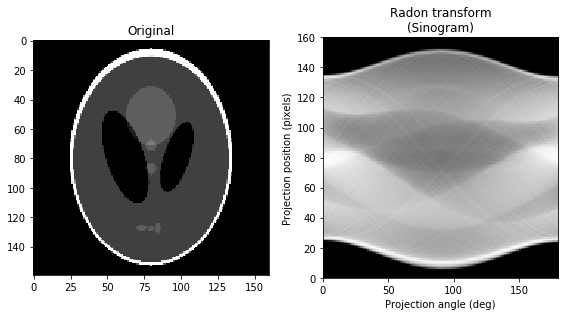

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale

image = imread(data_dir + "/phantom.png", as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

# 2. 원점에서의 sinogram

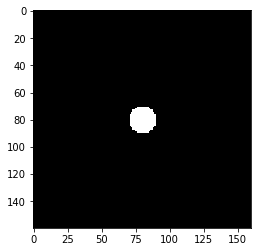

In [57]:
from skimage import draw


img = np.zeros((160, 160), dtype=np.float64)
rr, cc, = draw.circle(int((img.shape[0]) * .5), int(img.shape[0] * .5), 10)
img[rr, cc] = 1
plt.imshow(img, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

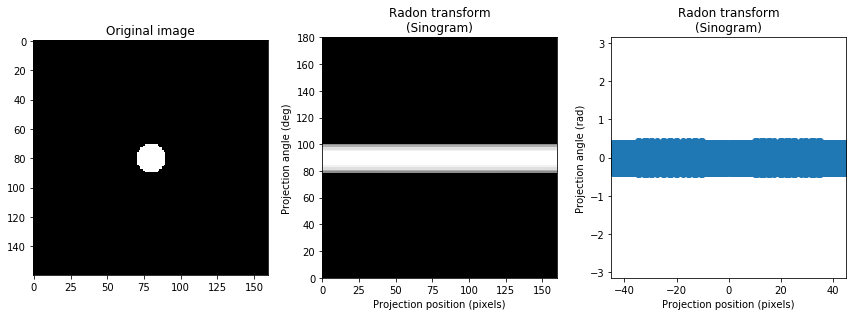

In [58]:
theta = np.linspace(0, 180, max(image.shape), endpoint=False)
sinogram = radon(img, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
sinogram = radon(img, theta=theta_count, circle=True)
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent = (0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, theta_count)

fig.tight_layout()
plt.show()

# 3.  옆으로 조금 옮겼을때의 sinogram

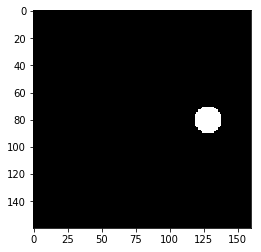

In [59]:

img2 = np.zeros((160, 160), dtype=np.float64)
rr, cc, = draw.circle(int((img2.shape[0]) * .5), int(img2.shape[0] * .8), 10)
img2[rr, cc] = 1
plt.imshow(img2, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

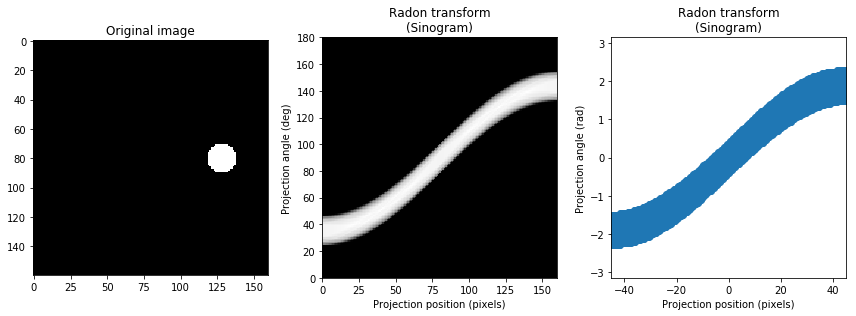

In [60]:
theta = np.linspace(0, 180, max(img2.shape), endpoint=False)
sinogram = radon(img2, theta=theta, circle=True)
r_count = ((sinogram.nonzero()[1]/80)-1)*45.5
theta_count = ((sinogram.nonzero()[0]/80)-1)*np.pi
plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,4.5))

ax1.set_title("Original image")
ax1.imshow(img2, cmap = plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)")
ax2.imshow(sinogram,cmap =plt.cm.Greys_r,
           extent=(0, sinogram.shape[0],0,180),aspect ='auto')

ax3.set_xlim([-45,45])
ax3.set_ylim([-np.pi, np.pi])
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (rad)")

plt.scatter(r_count, -theta_count)

fig.tight_layout()
plt.show()

# 4. 위에 데이터를 가지고 만들기

# Theta 값이 0인 것만 따로 추려내기 위해 for문을 돌림

In [61]:

Theta_zero=[]

for i in range(0,len(b)):

    if (b[:][i][2]== 0):
        Theta_zero.append((b[:][i][:]))
    

In [62]:
Theta_zero

[array([8.88178420e-15, 2.86391977e-01, 0.00000000e+00]),
 array([-1.06581410e-14, -5.23598776e-01,  0.00000000e+00]),
 array([1.06581410e-14, 2.86391977e-01, 0.00000000e+00]),
 array([-1.06581410e-14, -7.60805574e-01,  0.00000000e+00]),
 array([42.38981678,  1.41908178,  0.        ]),
 array([-36.9461467 ,  -0.62322014,   0.        ]),
 array([-44.90415587,   1.57079633,   0.        ]),
 array([45.5       ,  1.04719755,  0.        ]),
 array([22.75,  0.  ,  0.  ]),
 array([-5.46025271,  0.4033033 ,  0.        ]),
 array([42.38981678,  1.41908178,  0.        ]),
 array([ 5.46025271, -0.64389425,  0.        ]),
 array([-39.40415587,   1.57079633,   0.        ]),
 array([1.06581410e-14, 2.86391977e-01, 0.00000000e+00]),
 array([18.18189151, -0.11251613,  0.        ]),
 array([-45.5       ,   1.04719755,   0.        ]),
 array([-1.06581410e-14, -5.23598776e-01,  0.00000000e+00]),
 array([-1.06581410e-14, -5.23598776e-01,  0.00000000e+00]),
 array([-45.5       ,   1.04719755,   0.        ]

In [63]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale


In [64]:
theta_zero_count = []

for i in range(0,len(Theta_zero)):
    theta_zero_count.append(Theta_zero[i][1])
    
theta_zero_count

[0.28639197671465466,
 -0.5235987755982993,
 0.28639197671465466,
 -0.7608055744819433,
 1.4190817798993836,
 -0.6232201427334184,
 1.5707963267948966,
 1.0471975511965979,
 0.0,
 0.40330329867034465,
 1.4190817798993836,
 -0.6438942525262533,
 1.5707963267948963,
 0.28639197671465466,
 -0.11251612989187691,
 1.0471975511965972,
 -0.5235987755982993,
 -0.5235987755982993,
 1.0471975511965972,
 1.3335895279112524,
 1.5707963267948963,
 0.28639197671465466,
 -0.523598775598299,
 -0.7608055744819433,
 1.0471975511965972,
 -1.3335895279112526,
 0.5235987755982987,
 1.5707963267948966,
 -0.7608055744819433,
 1.5707963267948963,
 -0.5235987755982993,
 0.0,
 -0.7608055744819429,
 -0.2372067988836441,
 -0.5235987755982993,
 -0.6438942525262532,
 -0.7608055744819433,
 -0.11251612989187733,
 -3.9558851622914144e-16,
 1.4190817798993836,
 0.28639197671465466,
 -0.7608055744819433,
 -0.2372067988836445,
 1.0471975511965976,
 0.28639197671465466,
 -0.7608055744819433,
 0.28639197671465466,
 0.52359

In [65]:
len(theta_zero_count)

28792

## radian으로 되어 있던걸 degree로 바꿔 줌

### ( 나중에 5도 간격으로 보이기 쉽게 하기위해 degree로 변환한것 )

In [66]:
degree = []

for i in range(0,len(theta_zero_count)):
    degree.append(math.degrees(theta_zero_count[i]))
degree

# math.degrees 를 사용해서 라디안으로 되어있던 각도를 degree로 바꿔줌
    

[16.40905155215866,
 -30.000000000000025,
 16.40905155215866,
 -43.590948447841356,
 81.3073967721475,
 -35.70788388616564,
 90.0,
 60.00000000000001,
 0.0,
 23.107576877514855,
 81.3073967721475,
 -36.89242312248516,
 89.99999999999999,
 16.40905155215866,
 -6.446699369950311,
 59.99999999999997,
 -30.000000000000025,
 -30.000000000000025,
 59.99999999999997,
 76.40905155215866,
 89.99999999999999,
 16.40905155215866,
 -30.00000000000001,
 -43.590948447841356,
 59.99999999999997,
 -76.40905155215867,
 29.999999999999993,
 90.0,
 -43.590948447841356,
 89.99999999999999,
 -30.000000000000025,
 0.0,
 -43.59094844784133,
 -13.590948447841335,
 -30.000000000000025,
 -36.892423122485155,
 -43.590948447841356,
 -6.446699369950335,
 -2.2665552403772275e-14,
 81.3073967721475,
 16.40905155215866,
 -43.590948447841356,
 -13.590948447841356,
 59.99999999999999,
 16.40905155215866,
 -43.590948447841356,
 16.40905155215866,
 29.999999999999993,
 90.0,
 -7.403990657069208,
 29.999999999999993,
 29.

In [67]:
len(degree)

28792

In [68]:
degrees = np.array(degree)
degrees

array([ 16.40905155, -30.        ,  16.40905155, ..., -81.30739677,
        90.        ,  90.        ])

In [69]:
degrees[degrees< 0 ] = degrees[degrees< 0 ]+ 180
degrees



# - 각도인 것들만 따로 인덱싱 하여 180도 더하여 둔각으로 변환 

array([ 16.40905155, 150.        ,  16.40905155, ...,  98.69260323,
        90.        ,  90.        ])

In [70]:
degrees1 = []
for i in range(0,len(degrees)):
    degrees1.append(int(degrees[i]))
                    
degrees1

[16,
 149,
 16,
 136,
 81,
 144,
 90,
 60,
 0,
 23,
 81,
 143,
 89,
 16,
 173,
 59,
 149,
 149,
 59,
 76,
 89,
 16,
 150,
 136,
 59,
 103,
 29,
 90,
 136,
 89,
 149,
 0,
 136,
 166,
 149,
 143,
 136,
 173,
 179,
 81,
 16,
 136,
 166,
 59,
 16,
 136,
 16,
 29,
 90,
 172,
 29,
 29,
 84,
 23,
 0,
 89,
 173,
 76,
 143,
 172,
 43,
 59,
 149,
 0,
 76,
 136,
 16,
 16,
 29,
 29,
 29,
 0,
 59,
 149,
 120,
 179,
 149,
 46,
 106,
 84,
 67,
 16,
 23,
 16,
 81,
 23,
 90,
 84,
 29,
 29,
 136,
 163,
 84,
 16,
 136,
 136,
 29,
 21,
 120,
 7,
 149,
 29,
 76,
 103,
 133,
 16,
 60,
 76,
 90,
 120,
 166,
 16,
 59,
 149,
 90,
 149,
 127,
 59,
 29,
 29,
 136,
 103,
 38,
 59,
 16,
 0,
 16,
 89,
 144,
 29,
 7,
 172,
 149,
 7,
 149,
 29,
 36,
 23,
 173,
 23,
 81,
 141,
 29,
 16,
 35,
 21,
 143,
 90,
 29,
 29,
 16,
 149,
 23,
 96,
 0,
 95,
 136,
 136,
 0,
 0,
 90,
 173,
 23,
 84,
 143,
 103,
 29,
 179,
 90,
 149,
 143,
 59,
 84,
 136,
 0,
 29,
 90,
 29,
 149,
 16,
 96,
 7,
 81,
 23,
 23,
 23,
 29,
 150,
 143,
 

In [71]:
r_count = []

for i in range(0,len(c)):
    r_count.append(c[i][0])
    
r_count

# R 인 것들만 따로 추출하여 리스트로 만들어 주었다.

[8.881784197001252e-15,
 -1.0658141036401503e-14,
 1.0658141036401503e-14,
 -1.0658141036401503e-14,
 42.389816778592724,
 -36.94614669504294,
 -44.90415587219196,
 45.5,
 22.750000000000004,
 -5.460252711758628,
 42.389816778592724,
 5.460252711758624,
 -39.40415587219195,
 1.0658141036401503e-14,
 18.181891505152,
 -45.5,
 -1.0658141036401503e-14,
 -1.0658141036401503e-14,
 -45.5,
 40.539332752278995,
 44.904155872191964,
 1.0658141036401503e-14,
 -33.90415587219195,
 -1.0658141036401503e-14,
 -45.5,
 -40.539332752278995,
 7.105427357601002e-15,
 39.404155872191964,
 -1.0658141036401503e-14,
 44.904155872191964,
 -1.0658141036401503e-14,
 22.750000000000004,
 40.539332752278995,
 23.40539467729609,
 -1.0658141036401503e-14,
 -5.460252711758656,
 -1.0658141036401503e-14,
 -18.181891505152002,
 -13.223720558371179,
 42.389816778592724,
 8.881784197001252e-15,
 -1.7763568394002505e-14,
 -23.405394677296094,
 32.27627944162883,
 8.881784197001252e-15,
 -1.7763568394002505e-14,
 1.0658141

In [72]:
len(r_count)

28792

In [73]:
r_counts = np.array(r_count)
r_counts

array([ 8.88178420e-15, -1.06581410e-14,  1.06581410e-14, ...,
        4.23898168e+01,  2.78607147e-15, -4.49041559e+01])

In [74]:
r_counts = np.array(r_count)
r_counts = r_counts+45.5
r_counts

array([45.5       , 45.5       , 45.5       , ..., 87.88981678,
       45.5       ,  0.59584413])

In [75]:
image = np.zeros((180,92), dtype=np.float64)

# numpy array로 빈 행렬을 만들어 이미지로 만듬

In [76]:
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
for i in range(0,len(r_counts)):
    image[int(degrees1[i])][int(r_counts[i])] = image[int(degrees1[i])][int(r_counts[i])] + 1 
    
    
    
# R 값과 Phi 값을 numpy array에 맵핑하여 값을 바꿔줌

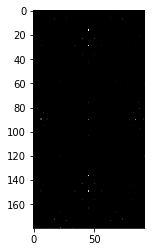

In [78]:
plt.imshow(image, cmap=plt.cm.Greys_r)

# 그림이 작아 보이지 않아서 확대함

<Figure size 432x288 with 0 Axes>

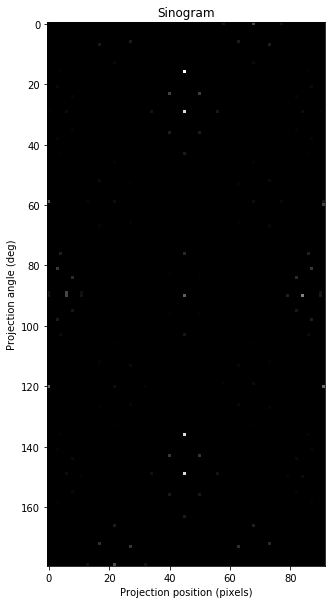

In [79]:
plt.figure()
fig, (ax1) = plt.subplots(1, 1, figsize = (12,10))
ax1.set_title("Sinogram")
ax1.set_xlabel("Projection position (pixels)")
ax1.set_ylabel("Projection angle (deg)")
plt.imshow(image, cmap=plt.cm.Greys_r)

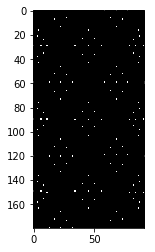

In [80]:
plt.imshow(image, cmap=plt.cm.Greys_r,vmax=1)

<Figure size 432x288 with 0 Axes>

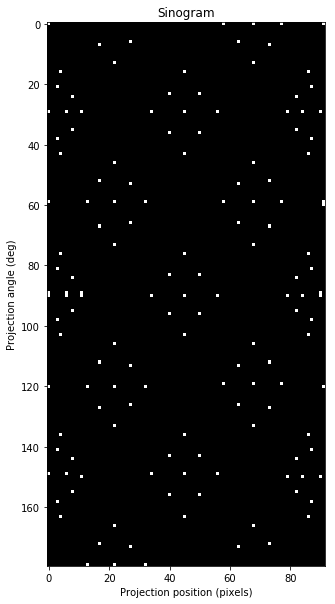

In [81]:
plt.figure()
fig, (ax1) = plt.subplots(1, 1, figsize = (12,10))
ax1.set_title("Sinogram")
ax1.set_xlabel("Projection position (pixels)")
ax1.set_ylabel("Projection angle (deg)")
plt.imshow(image, cmap=plt.cm.Greys_r,vmax=1)

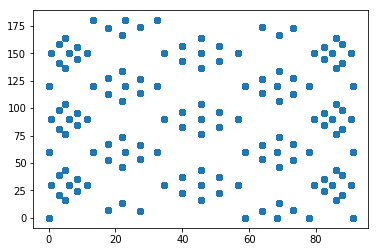

In [82]:

plt.scatter(r_counts,degrees)

# Intensity를 한눈에 보기위해서 5 degree로 잘라 보았다

In [83]:
int_degrees1 = np.array(degrees1)
int_degrees1

array([ 16, 149,  16, ...,  98,  90,  90])

In [84]:
degrees2 = int_degrees1/5

degrees3 =[]
for i in range(0,len(degrees2)):
    degrees3.append(int(degrees2[i]))
degrees3




# 5도 간격으로 나누기 위해서 5로 나눴다가 곱하면 5단위로 바뀌기 때문에 5로 나눠주었다.

[3,
 29,
 3,
 27,
 16,
 28,
 18,
 12,
 0,
 4,
 16,
 28,
 17,
 3,
 34,
 11,
 29,
 29,
 11,
 15,
 17,
 3,
 30,
 27,
 11,
 20,
 5,
 18,
 27,
 17,
 29,
 0,
 27,
 33,
 29,
 28,
 27,
 34,
 35,
 16,
 3,
 27,
 33,
 11,
 3,
 27,
 3,
 5,
 18,
 34,
 5,
 5,
 16,
 4,
 0,
 17,
 34,
 15,
 28,
 34,
 8,
 11,
 29,
 0,
 15,
 27,
 3,
 3,
 5,
 5,
 5,
 0,
 11,
 29,
 24,
 35,
 29,
 9,
 21,
 16,
 13,
 3,
 4,
 3,
 16,
 4,
 18,
 16,
 5,
 5,
 27,
 32,
 16,
 3,
 27,
 27,
 5,
 4,
 24,
 1,
 29,
 5,
 15,
 20,
 26,
 3,
 12,
 15,
 18,
 24,
 33,
 3,
 11,
 29,
 18,
 29,
 25,
 11,
 5,
 5,
 27,
 20,
 7,
 11,
 3,
 0,
 3,
 17,
 28,
 5,
 1,
 34,
 29,
 1,
 29,
 5,
 7,
 4,
 34,
 4,
 16,
 28,
 5,
 3,
 7,
 4,
 28,
 18,
 5,
 5,
 3,
 29,
 4,
 19,
 0,
 19,
 27,
 27,
 0,
 0,
 18,
 34,
 4,
 16,
 28,
 20,
 5,
 35,
 18,
 29,
 28,
 11,
 16,
 27,
 0,
 5,
 18,
 5,
 29,
 3,
 19,
 1,
 16,
 4,
 4,
 4,
 5,
 30,
 28,
 28,
 0,
 29,
 3,
 5,
 35,
 8,
 29,
 3,
 5,
 29,
 18,
 18,
 27,
 4,
 18,
 5,
 24,
 16,
 0,
 28,
 0,
 24,
 29,
 16,
 3,
 5,
 29,


In [85]:
int_degrees3 = np.array(degrees3)
int_degrees3

array([ 3, 29,  3, ..., 19, 18, 18])

In [86]:
degrees4 = int_degrees3*5
degrees4
#5 도 간격으로 convert 한것

array([ 15, 145,  15, ...,  95,  90,  90])

In [87]:
int_degrees3.max()

35

In [88]:
int_degrees3.min()

0

int_degrees3  는 5도 간격으로 바꾼것

## 5도 간격으로 해서 intensity 확인해보려고 int_degrees3를 만들어봄

In [89]:
image1 = np.zeros((36,92), dtype=np.float64)
image1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
for i in range(0,len(r_counts)):
    image1[int_degrees3[i]][int(r_counts[i]-1)] = image1[int_degrees3[i]][int(r_counts[i]-1)] + 1 
    

<Figure size 432x288 with 0 Axes>

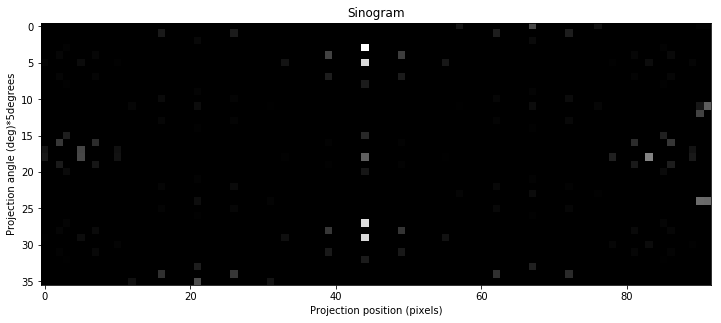

In [91]:
plt.figure()
fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
ax2.set_title("Sinogram")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)*5degrees")
plt.imshow(image1, cmap=plt.cm.Greys_r)

<Figure size 432x288 with 0 Axes>

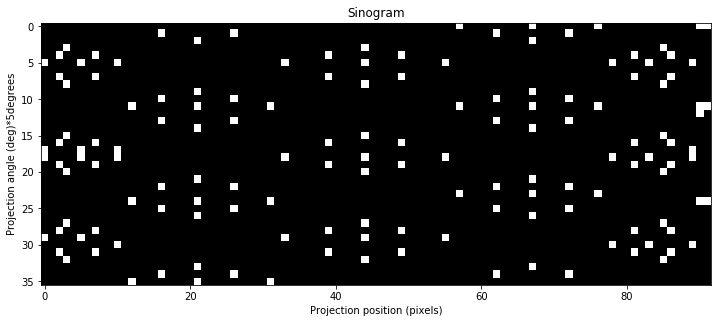

In [92]:
plt.figure()
fig, (ax2) = plt.subplots(1, 1, figsize = (12,10))
ax2.set_title("Sinogram")
ax2.set_xlabel("Projection position (pixels)")
ax2.set_ylabel("Projection angle (deg)*5degrees")
plt.imshow(image1, cmap=plt.cm.Greys_r,vmax=1)

# Theta가 0이 아닌 Indirect plane 포함한 sinogram 만들어보기

In [93]:

Theta_total=[]

for i in range(0,len(b)):
    Theta_total.append((b[i][1]))
    
Theta_total
    

[0.28639197671465466,
 -0.5235987755982993,
 0.28639197671465466,
 -0.7608055744819433,
 1.4190817798993836,
 -1.176421565949354,
 -0.6232201427334184,
 1.5707963267948966,
 -0.7608055744819433,
 1.0471975511965979,
 0.0,
 0.40330329867034465,
 1.4190817798993836,
 1.0471975511965972,
 -1.159713681088475,
 -0.6438942525262533,
 1.5707963267948963,
 0.28639197671465466,
 -0.11251612989187691,
 1.0471975511965972,
 -0.5235987755982993,
 -0.5235987755982993,
 1.0471975511965972,
 1.3335895279112524,
 1.5707963267948963,
 0.28639197671465466,
 -0.523598775598299,
 -0.7608055744819433,
 1.0471975511965972,
 -1.3335895279112526,
 0.5235987755982987,
 1.5707963267948966,
 -0.7608055744819433,
 1.5707963267948963,
 -1.419081779899384,
 -0.5235987755982993,
 0.0,
 -0.7608055744819429,
 -0.2372067988836441,
 -0.5235987755982993,
 -0.6438942525262532,
 -0.7608055744819433,
 -0.11251612989187733,
 -3.9558851622914144e-16,
 1.4190817798993836,
 0.28639197671465466,
 -0.6438942525262532,
 -0.7608055

In [94]:
Theta_total_count = np.array(Theta_total)
Theta_total_count

array([ 0.28639198, -0.52359878,  0.28639198, ..., -0.52359878,
        1.57079633,  1.57079633])

In [95]:
Theta_total_count[Theta_total_count< 0 ] = Theta_total_count[Theta_total_count< 0 ] +math.pi/2
Theta_total_count

array([0.28639198, 1.04719755, 0.28639198, ..., 1.04719755, 1.57079633,
       1.57079633])

In [96]:
Theta_total_count=Theta_total_count*100


# radian으로 이미지 매핑하기 위해 100을 곱해서 진행

### (이미지 맵핑하기 위해 소수점 자리들을 100을 곱해 정수로 만들어서 맵핑을 진행함)

In [97]:
Theta_total_count.max()  #math.pi 랑 같은 값

157.07963267948966

In [98]:
Theta_total_count.min()

0.0

In [99]:
r_count_total = []

for i in range(0,len(b)):
    r_count_total.append(b[i][0])
    
r_count_total

[8.881784197001252e-15,
 -1.0658141036401503e-14,
 1.0658141036401503e-14,
 -1.0658141036401503e-14,
 42.389816778592724,
 27.638118203690695,
 -36.94614669504294,
 -44.90415587219196,
 -1.0658141036401503e-14,
 45.5,
 22.750000000000004,
 -5.460252711758628,
 42.389816778592724,
 -45.5,
 18.181891505151984,
 5.460252711758624,
 -39.40415587219195,
 1.0658141036401503e-14,
 18.181891505152,
 -45.5,
 -1.0658141036401503e-14,
 -1.0658141036401503e-14,
 -45.5,
 40.539332752278995,
 44.904155872191964,
 1.0658141036401503e-14,
 -33.90415587219195,
 -1.0658141036401503e-14,
 -45.5,
 -40.539332752278995,
 7.105427357601002e-15,
 39.404155872191964,
 -1.0658141036401503e-14,
 44.904155872191964,
 42.38981677859272,
 -1.0658141036401503e-14,
 22.750000000000004,
 40.539332752278995,
 23.40539467729609,
 -1.0658141036401503e-14,
 -5.460252711758656,
 -1.0658141036401503e-14,
 -18.181891505152002,
 -13.223720558371179,
 42.389816778592724,
 8.881784197001252e-15,
 -5.460252711758656,
 -1.7763568

In [100]:
r_counts_total= np.array(r_count_total)
r_counts_total = r_counts_total+45.5
r_counts_total

array([45.5       , 45.5       , 45.5       , ..., 45.5       ,
       45.5       ,  0.59584413])

In [101]:
len(r_counts_total)

32418

In [102]:
len(Theta_total_count)

32418

In [103]:
image3 = np.zeros((158,92), dtype=np.float64)

In [104]:
image3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
image3.max()

0.0

In [106]:
image3.min()

0.0

In [107]:
image3 = np.zeros((158,92), dtype=np.float64)

image3 = np.zeros((180,92), dtype=np.float64)

In [108]:
for i in range(0,len(r_counts_total)):
    image3[int(Theta_total_count[i]-1)][int(r_counts_total[i])] = image3[int(Theta_total_count[i])-1][int(r_counts_total[i])] + 1 

문제 발생 라디안으로 할시 np.array로 이미지 맵핑을 하기 때문에 정수로 들어가면서 소수점 자리가 많이 잃어버리기 떄문에 잘 안됨

100을 곱해서 맵핑 

In [109]:
image3

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [394.,   0.,   0., ...,   0., 399.,   0.],
       [ 37.,   0.,   0., ...,   0.,   0.,  30.]])

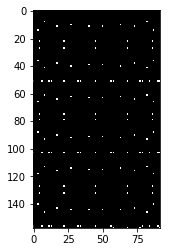

In [110]:
plt.imshow(image3, cmap=plt.cm.Greys_r,vmax=1)

<Figure size 432x288 with 0 Axes>

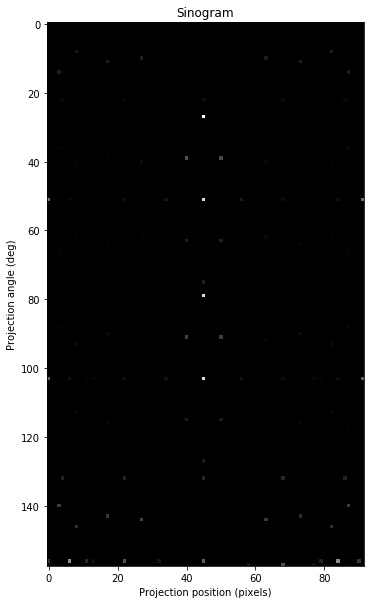

In [172]:
plt.figure()
fig, (ax3) = plt.subplots(1, 1, figsize = (12,10))
ax3.set_title("Sinogram")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (deg)")
plt.imshow(image3, cmap=plt.cm.Greys_r)

---
---
---
---
---
---
---
---

---
---
---
---
---
---
---
---

---
---
---
---
---
---
---
---

---
---
---
---
---
---
---
---

## 검증 

In [146]:
image1.shape

(36, 92)

In [149]:
image1[:, 44]

array([   0.,    0.,    0., 2206.,    0., 1687.,    0.,    0.,  214.,
          0.,    0.,    0.,    0.,    0.,    0.,  301.,    0.,    0.,
        678.,    0.,  167.,    0.,    0.,    0.,    0.,    0.,    0.,
       1714.,    0., 1663.,    0.,    0.,  211.,    0.,    0.,    0.])

In [151]:
image1[np.nonzero(image1[:, 44]), 44]

array([[2206., 1687.,  214.,  301.,  678.,  167., 1714., 1663.,  211.]])

In [155]:
np.nonzero(image1[:, 44])[0] * 5

array([ 15,  25,  40,  75,  90, 100, 135, 145, 160], dtype=int64)

<Figure size 432x288 with 0 Axes>

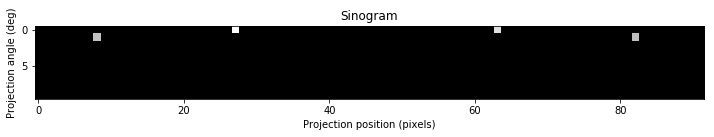

In [125]:
plt.figure()
fig, (ax3) = plt.subplots(1, 1, figsize = (12,10))
ax3.set_title("Sinogram")
ax3.set_xlabel("Projection position (pixels)")
ax3.set_ylabel("Projection angle (deg)")
plt.imshow(image3[40:50], cmap=plt.cm.Greys_r)

In [122]:
image3.max()


2313.0

In [121]:
image3[image3 == 2313]

array([2313.])

---
---
---

In [157]:
image3.shape

(158, 92)

In [158]:
image3[:, 45]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,  170.,    0.,    0.,    0.,    0.,
       2313.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0., 1779.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,  230.,    0.,    0.,    0., 1776.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0., 1779.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  224.,

In [159]:
image3[np.nonzero(image3[:, 45]), 45]

array([[ 170., 2313., 1779.,  230., 1776., 1779.,  224.,  304.,  710.]])

In [166]:
np.nonzero(image3[:, 45])[0] / 157 * 179

array([ 25.08280255,  30.78343949,  58.14649682,  85.50955414,
        90.07006369, 117.43312102, 144.79617834, 150.49681529,
       177.85987261])

###  검증을 위해 histogram을 이용해 각도 별로 뽑아서 값들을 확인해봄

(array([5617., 1478., 1338., 1569., 5379., 7045., 1595., 1290., 1444.,
        5663.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <a list of 10 Patch objects>)

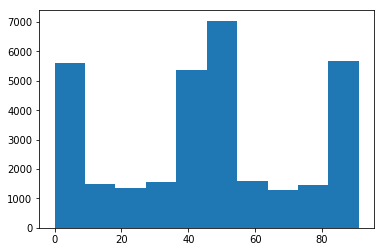

In [114]:
plt.hist(r_counts_total)

1


(array([ 288.,  218.,   61.,  358.,  465., 4317.,  557.,  564.,  345.,
         227.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <a list of 10 Patch objects>)

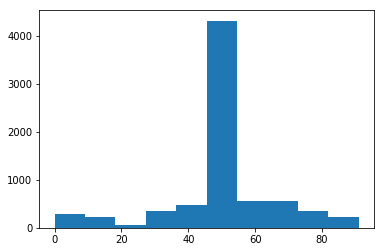

In [115]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(30*(int(x)-1)))&(c[:][i][1] < math.radians(30*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


4


(array([ 674.,  144.,    0.,   18.,  671.,    7.,   16.,    0.,  248.,
        1150.]),
 array([ 0.59584413,  9.5766753 , 18.55750648, 27.53833765, 36.51916883,
        45.5       , 54.48083117, 63.46166235, 72.44249352, 81.4233247 ,
        90.40415587]),
 <a list of 10 Patch objects>)

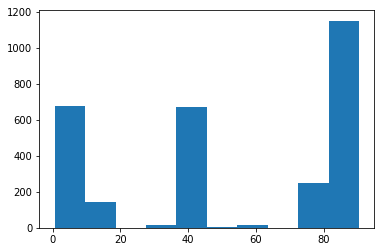

In [168]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(30*(int(x)-1)))&(c[:][i][1] < math.radians(30*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


3


(array([61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 81.]),
 array([22.09460532, 26.77568426, 31.45676319, 36.13784213, 40.81892106,
        45.5       , 50.18107894, 54.86215787, 59.54323681, 64.22431574,
        68.90539468]),
 <a list of 10 Patch objects>)

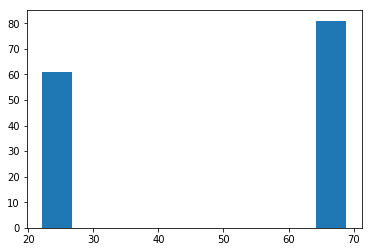

In [117]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


4


(array([  26.,    0.,    0.,    0.,    0., 2206.,    0.,    0.,    0.,
          28.]),
 array([ 4.96066725, 13.0685338 , 21.17640035, 29.2842669 , 37.39213345,
        45.5       , 53.60786655, 61.7157331 , 69.82359965, 77.9314662 ,
        86.03933275]),
 <a list of 10 Patch objects>)

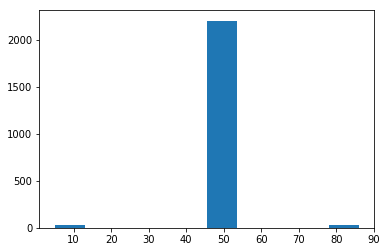

In [119]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


5


(array([105.,   0.,   0.,   0., 465., 424.,   0.,   0.,   0., 127.]),
 array([ 3.11018322, 11.58814658, 20.06610993, 28.54407329, 37.02203664,
        45.5       , 53.97796336, 62.45592671, 70.93389007, 79.41185342,
        87.88981678]),
 <a list of 10 Patch objects>)

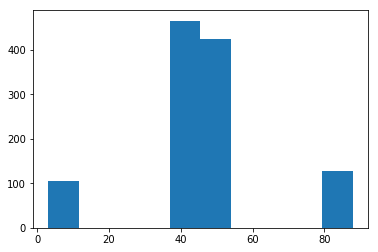

In [120]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


6


(array([ 127.,   24.,    0.,  150.,    0., 1687.,  180.,    0.,    0.,
          46.]),
 array([ 0.59584413,  9.5766753 , 18.55750648, 27.53833765, 36.51916883,
        45.5       , 54.48083117, 63.46166235, 72.44249352, 81.4233247 ,
        90.40415587]),
 <a list of 10 Patch objects>)

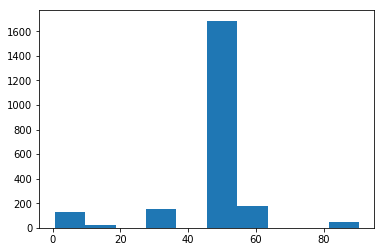

In [121]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


7


(array([ 23.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 101.]),
 array([79.40415587, 79.95415587, 80.50415587, 81.05415587, 81.60415587,
        82.15415587, 82.70415587, 83.25415587, 83.80415587, 84.35415587,
        84.90415587]),
 <a list of 10 Patch objects>)

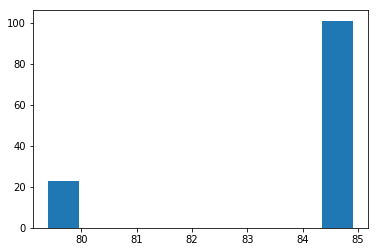

In [122]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


8


(array([ 89.,   0.,   0.,   0., 221., 215.,   0.,   0.,   0.,  96.]),
 array([ 3.11018322, 11.58814658, 20.06610993, 28.54407329, 37.02203664,
        45.5       , 53.97796336, 62.45592671, 70.93389007, 79.41185342,
        87.88981678]),
 <a list of 10 Patch objects>)

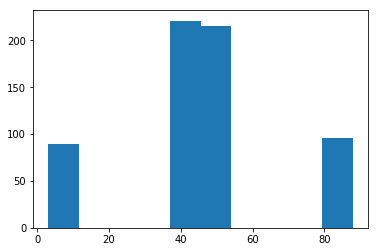

In [123]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


9


(array([ 24.,   0.,   0.,   0.,   0., 214.,   0.,   0.,   0.,  19.]),
 array([ 4.96066725, 13.0685338 , 21.17640035, 29.2842669 , 37.39213345,
        45.5       , 53.60786655, 61.7157331 , 69.82359965, 77.9314662 ,
        86.03933275]),
 <a list of 10 Patch objects>)

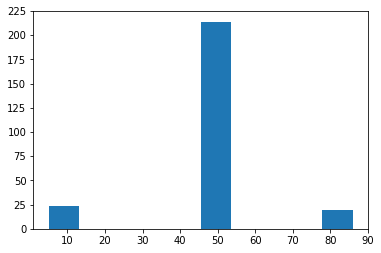

In [124]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)


10


(array([36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 41.]),
 array([22.09460532, 26.77568426, 31.45676319, 36.13784213, 40.81892106,
        45.5       , 50.18107894, 54.86215787, 59.54323681, 64.22431574,
        68.90539468]),
 <a list of 10 Patch objects>)

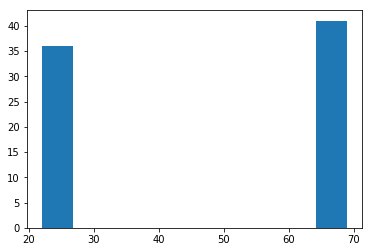

In [125]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



11


(array([82., 41.,  0.,  0.,  0.,  0.,  0.,  0., 53., 89.]),
 array([17.8618818 , 23.38950544, 28.91712908, 34.44475272, 39.97237636,
        45.5       , 51.02762364, 56.55524728, 62.08287092, 67.61049456,
        73.1381182 ]),
 <a list of 10 Patch objects>)

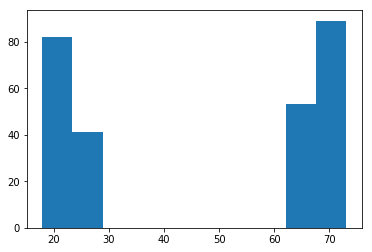

In [126]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



12


(array([  0.,   0.,   0.,   0.,   0., 656.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

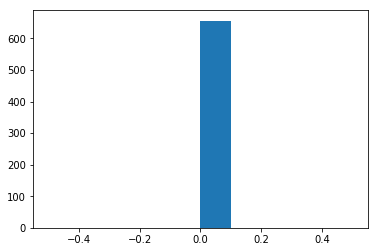

In [132]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



13


(array([ 55., 101.,  13.,   0.,   0.,  17.,   0.,  98.,  56., 632.]),
 array([13.22372056, 21.0013485 , 28.77897645, 36.55660439, 44.33423234,
        52.11186028, 59.88948822, 67.66711617, 75.44474411, 83.22237206,
        91.        ]),
 <a list of 10 Patch objects>)

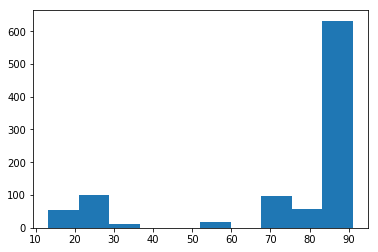

In [133]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



14


(array([58., 40.,  0.,  0.,  0.,  0.,  0.,  0., 41., 62.]),
 array([17.8618818 , 23.38950544, 28.91712908, 34.44475272, 39.97237636,
        45.5       , 51.02762364, 56.55524728, 62.08287092, 67.61049456,
        73.1381182 ]),
 <a list of 10 Patch objects>)

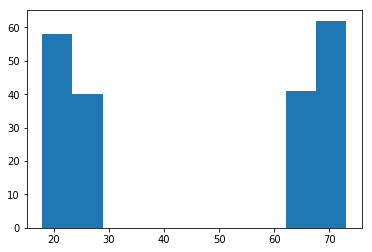

In [134]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



15


(array([23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.]),
 array([22.09460532, 26.77568426, 31.45676319, 36.13784213, 40.81892106,
        45.5       , 50.18107894, 54.86215787, 59.54323681, 64.22431574,
        68.90539468]),
 <a list of 10 Patch objects>)

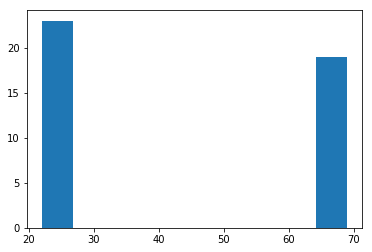

In [135]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



16


(array([232.,   0.,   0.,   0., 301.,   0.,   0.,   0.,   0., 245.]),
 array([ 4.96066725, 13.0685338 , 21.17640035, 29.2842669 , 37.39213345,
        45.5       , 53.60786655, 61.7157331 , 69.82359965, 77.9314662 ,
        86.03933275]),
 <a list of 10 Patch objects>)

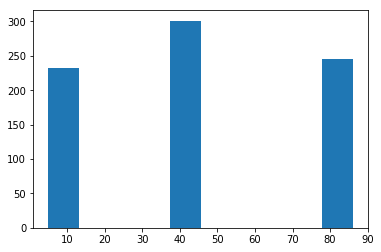

In [136]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



17


(array([714.,   0.,   0.,   0.,  27.,  34.,   0.,   0.,   0., 706.]),
 array([ 3.11018322, 11.58814658, 20.06610993, 28.54407329, 37.02203664,
        45.5       , 53.97796336, 62.45592671, 70.93389007, 79.41185342,
        87.88981678]),
 <a list of 10 Patch objects>)

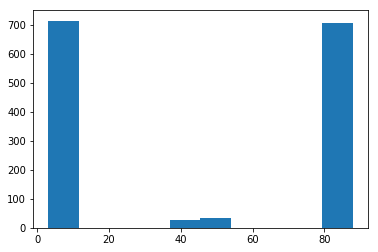

In [137]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



18


(array([638., 125.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 149.]),
 array([ 0.59584413,  9.5766753 , 18.55750648, 27.53833765, 36.51916883,
        45.5       , 54.48083117, 63.46166235, 72.44249352, 81.4233247 ,
        90.40415587]),
 <a list of 10 Patch objects>)

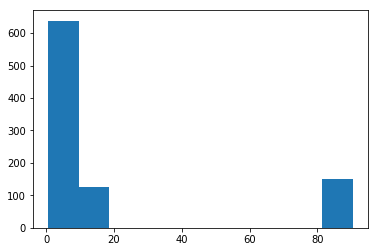

In [138]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)



19


(array([ 674.,  144.,    0.,   18.,  671.,    7.,   16.,    0.,  248.,
        1150.]),
 array([ 0.59584413,  9.5766753 , 18.55750648, 27.53833765, 36.51916883,
        45.5       , 54.48083117, 63.46166235, 72.44249352, 81.4233247 ,
        90.40415587]),
 <a list of 10 Patch objects>)

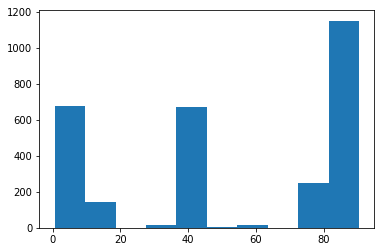

In [139]:
x = input()
d=[]
d1 = []

for i in range(0,len(c)):

    if (c[:][i][1]>= math.radians(5*(int(x)-1)))&(c[:][i][1] < math.radians(5*int(x))):
        d.append((c[:][i][:]))
for i in range(0,len(d)):
    d1.append(d[i][0])

    
    
d2=np.array(d1)
d2 = d2+45.5
d2   # r 값

plt.hist(d2)

